# TODO
- [ ] data preprocessing
    - 성별 미분류는 데이터에서 제거
- [ ] dummy variable
    - 모든 칼럼을 인코딩.
- [ ] pca.. or stepwise?
- [ ] visualization
- [ ] how to make logistic regression...?
    - [ ] does logistic regression use gradient descent..?

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import category_encoders as ce

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

import warnings

warnings.filterwarnings('ignore')

# korean font issue
plt.rcParams['font.family'] = 'NanumGothic'

In [5]:
raw_data = pd.read_excel('./HMA_rawdata.xlsx', engine='openpyxl', sheet_name=['raw_data'])
raw_data = raw_data['raw_data']

In [6]:
# columns
DAY = '요일'
MEDIA = '발송매체'
IS_ADVERTISEMENT = '메시지 광고성 여부'
IS_INCLUDE_FINANCE = '메시지 금융 관련 내용 여부'
AGE = '연령대'
GENDER = '성별'
TIME = '발송시간대'
IS_SUCCESS = '발송성공여부'
LOGIN_DAYS_IN_MONTH = '최근 30일 간  로그인 일수'
IS_APPROVED = '메시지 수용 여부'

raw_data = raw_data[raw_data[GENDER] != '미분류']
raw_X = raw_data.drop(IS_APPROVED, axis=1)
raw_y = raw_data[IS_APPROVED]

<Axes: xlabel='메시지 수용 여부', ylabel='Count'>

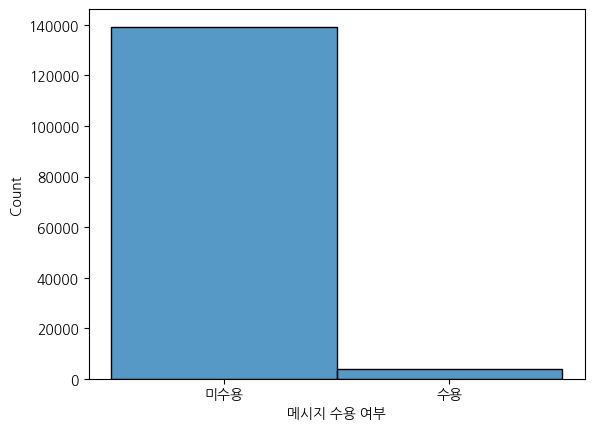

In [7]:
sns.histplot(raw_y)

In [8]:
raw_data.describe()

,요일,발송매체,메시지 광고성 여부,메시지 금융 관련 내용 여부,연령대,성별,발송시간대,발송성공여부,최근 30일 간 로그인 일수,메시지 수용 여부
count,143096,143096,143096,143096,143096,143096,143096,143096,143096,143096
unique,6,2,2,2,5,2,3,2,4,2
top,토,푸시,광고성,금융,50대,여자,점심,성공,1일~10일,미수용
freq,23862,71570,71553,71548,38859,73807,47702,139686,100782,139281


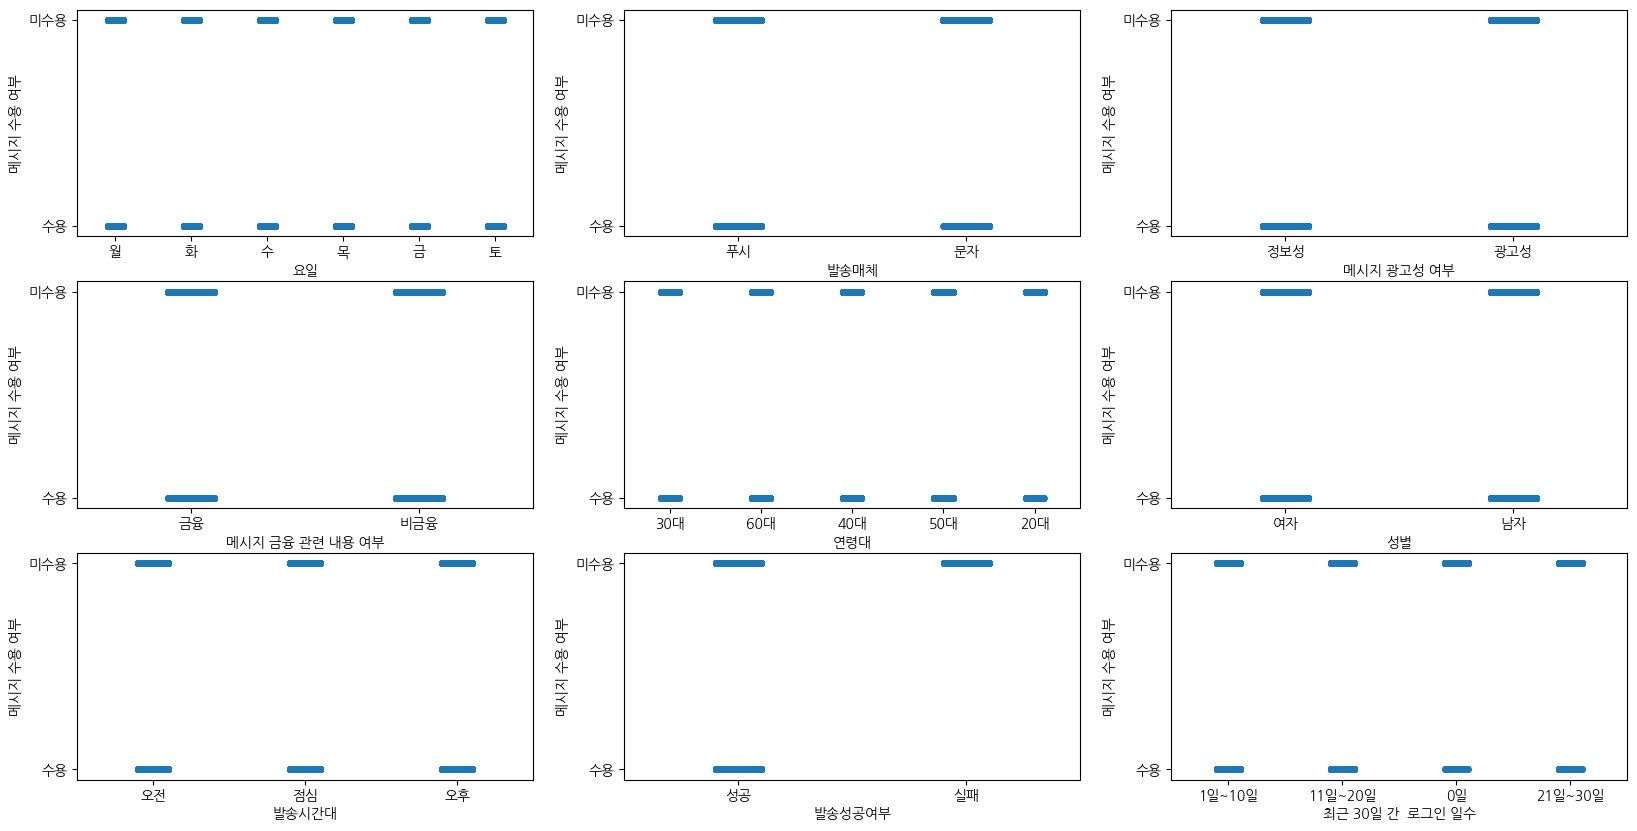

In [9]:
fig, ax = plt.subplots(3, 3)
fig.set_size_inches(20, 10)
x_list = [
    DAY,
    MEDIA,
    IS_ADVERTISEMENT,
    IS_INCLUDE_FINANCE,
    AGE,
    GENDER,
    TIME,
    IS_SUCCESS,
    LOGIN_DAYS_IN_MONTH,
]

for i in range(len(x_list)):
    row = i // 3 
    col = i % 3 
    sns.stripplot(x=x_list[i], y=IS_APPROVED, data=raw_data, ax=ax[row][col])

plt.show()

In [58]:
columns = [
    DAY,
    MEDIA,
    IS_ADVERTISEMENT,
    IS_INCLUDE_FINANCE,
    AGE,
    GENDER,
    TIME,
    LOGIN_DAYS_IN_MONTH,
]

_raw_X = raw_X.drop(IS_SUCCESS, axis=1)
X = pd.get_dummies(_raw_X, columns=columns, drop_first=True, dtype=int)
y = pd.get_dummies(raw_y, drop_first=True, dtype=int)

X.head()
for col in X.columns: print(col)

요일_목
요일_수
요일_월
요일_토
요일_화
발송매체_푸시
메시지 광고성 여부_정보성
메시지 금융 관련 내용 여부_비금융
연령대_30대
연령대_40대
연령대_50대
연령대_60대
성별_여자
발송시간대_오후
발송시간대_점심
최근 30일 간  로그인 일수_11일~20일
최근 30일 간  로그인 일수_1일~10일
최근 30일 간  로그인 일수_21일~30일


In [59]:
# train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# model = LogisticRegression()
# model.fit(train_X, train_y)

# pred_y = model.predict(test_X)

# print(accuracy_score(test_y, pred_y))
# print(classification_report(test_y, pred_y))

X = sm.add_constant(X)
tmp_X = X.copy()
tmp_y = y.copy()

model = sm.Logit(tmp_y, tmp_X).fit()

# Stepwise
while True:
    max_idx = np.argmax(model.pvalues)
    max_p_value = model.pvalues[max_idx]
    if max_p_value > 0.05:
        tmp_X = np.delete(tmp_X, max_idx, axis=1)
        model = sm.Logit(tmp_y, tmp_X).fit()
        print(model.summary())
        print(f">>> variable {max_idx} deleted")
    else:
        break

print(model.summary())
print(np.exp(model.params))

Optimization terminated successfully.
         Current function value: 0.111613
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.111614
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                     수용   No. Observations:               143096
Model:                          Logit   Df Residuals:                   143078
Method:                           MLE   Df Model:                           17
Date:                Fri, 22 Dec 2023   Pseudo R-squ.:                 0.09209
Time:                        17:34:29   Log-Likelihood:                -15971.
converged:                       True   LL-Null:                       -17591.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const 